In [1]:
import silq
silq.initialize('Antimony')

%matplotlib notebook

Initializing imports
Initializing functions
Initializing instruments
Initializing parameters
Initializing data
Initializing plotting
Initialization complete


In [26]:
ramp_to_voltages(0)

In [6]:
LB(0.48)
RB(0.48)
SRC(0.15)
TG(1.25)

# Turnon

In [2]:
vals = list(np.arange(0, 1.4, 0.002))
len(vals)

700

DataSet:
   location = '2017-05-04/#003_turnon_10-50-32'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | TG_LB_RB_set | TG_LB_RB     | (700,)
   Measured | DC_voltage   | DC_voltage   | (700,)


<IPython.core.display.Javascript object>


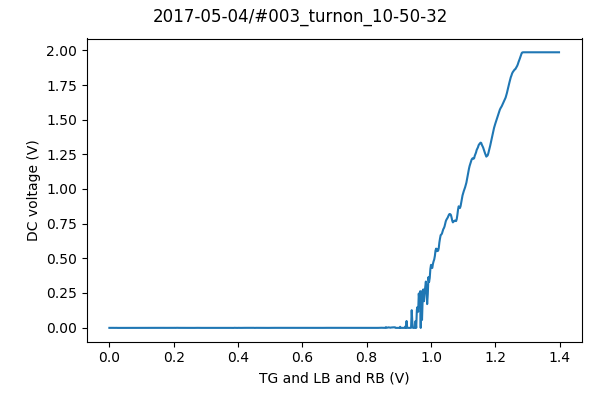

setting active
deactivating
DataSet:
   location = '2017-05-04/#003_turnon_10-50-32'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | TG_LB_RB_set | TG_LB_RB     | (700,)
   Measured | DC_voltage   | DC_voltage   | (700,)
started at 2017-05-04 10:56:42


In [3]:
DC_parameter.setup()
loop = Loop(turnon_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name='turnon')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()

# Pinchoff

In [3]:
pinchoff_parameter = RB
turnon_parameter(1.1)

vals = list(np.arange(1.1, 0, -0.002))
len(vals)

550

DataSet:
   location = '2017-05-04/#005_pinchoff_RB_11-04-37'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RB_set     | RB           | (550,)
   Measured | DC_voltage | DC_voltage   | (550,)


<IPython.core.display.Javascript object>


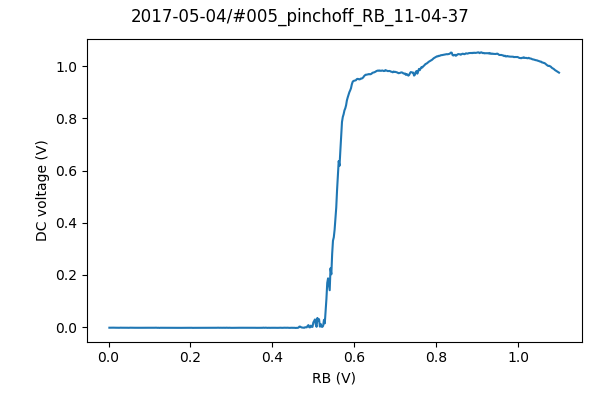

deactivating
DataSet:
   location = '2017-05-04/#005_pinchoff_RB_11-04-37'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RB_set     | RB           | (550,)
   Measured | DC_voltage | DC_voltage   | (550,)
started at 2017-05-04 11:06:46


In [4]:
DC_parameter.setup()
loop = Loop(pinchoff_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name=f'pinchoff_{pinchoff_parameter.name}')
plot = loop.plot(data.DC_voltage)

loop.run();

layout.stop()

# 1D Coulomb

In [32]:
parameter = TG
vals = list(np.arange(1.1, 1.6, 0.001))
len(vals)

500

In [38]:
DC_parameter.setup()
%timeit DC_parameter()

10 loops, best of 3: 74.9 ms per loop


<IPython.core.display.Javascript object>


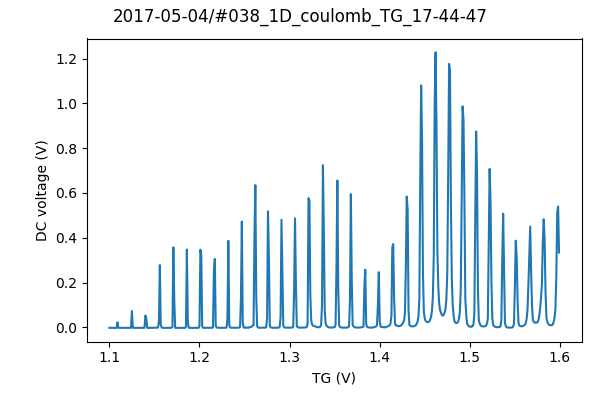

DataSet:
   data = load_data('2017-05-04/#038_1D_coulomb_TG_17-44-47')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TG_set     | TG           | (500,)
   Measured | DC_voltage | DC_voltage   | (500,)
started at 2017-05-04 17:44:48


In [37]:
DC_parameter.setup()
loop = Loop(parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name=f'1D_coulomb_{parameter.name}')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()
parameter(vals[0])

# 2D scans

In [9]:
x_vals = TG[np.arange(1.22, 1.27, 0.00025).tolist()]
y_vals = DF_DS[np.arange(0,0.8, 0.002).tolist()]
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X201 x Y400


In [31]:
x_vals = DF_DS.sweep(0.2, 0.7, num=150)
y_vals = TGAC.sweep(-0.1, 0.1, num=50)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X150 x Y50


<IPython.core.display.Javascript object>


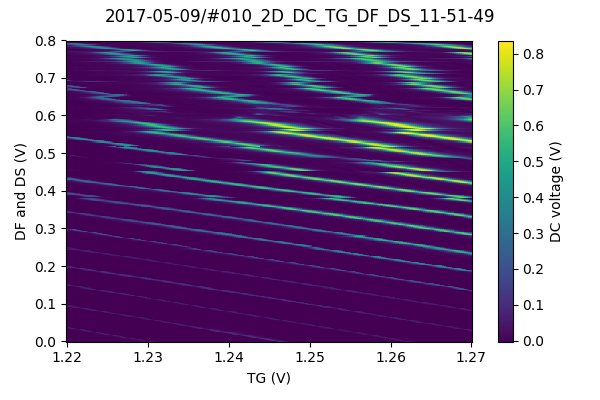

DataSet:
   data = load_data('2017-05-09/#010_2D_DC_TG_DF_DS_11-51-49')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DF_DS_set  | DF_DS        | (400,)
   Setpoint | TG_set     | TG           | (400, 201)
   Measured | DC_voltage | DC_voltage   | (400, 201)
started at 2017-05-09 11:51:49


In [10]:
DC_parameter.setup()
loop = Loop(y_vals).loop(
    x_vals).each(
        DC_parameter)
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
plot = loop.actions[0].plot(data.DC_voltage)
loop.run()

layout.stop()

<IPython.core.display.Javascript object>


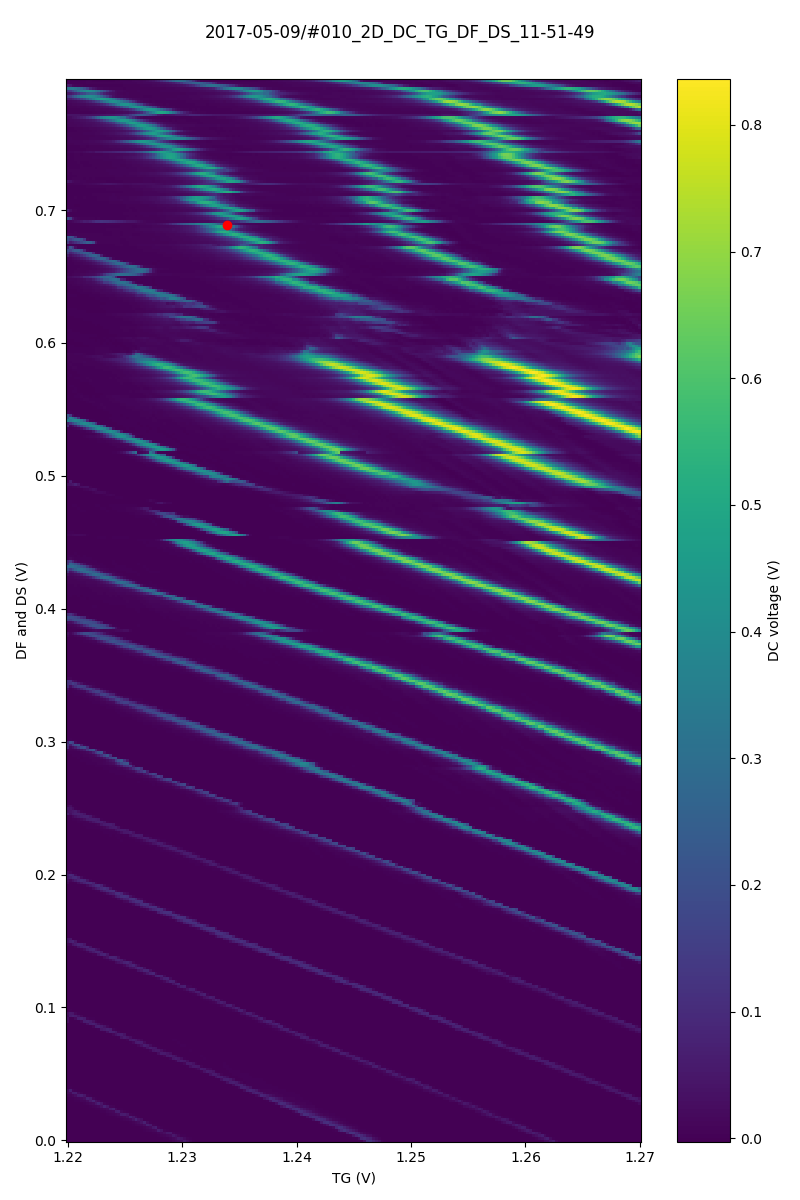

In [2]:
data = load_data('2017-05-09/#010_2D_DC_TG_DF_DS_11-51-49')
plot = DCPlot(data, figsize=(8, 12))

# Compensated scan

<IPython.core.display.Javascript object>


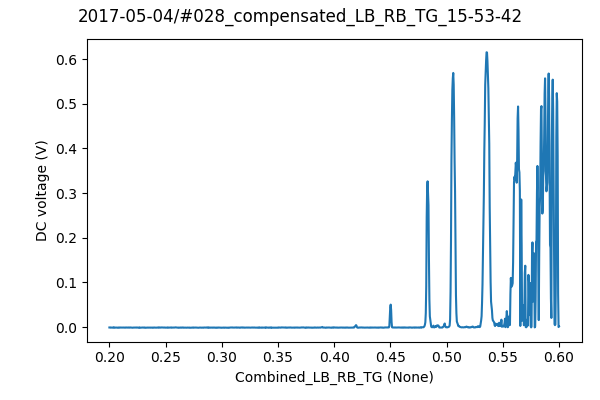

DataSet:
   data = load_data('2017-05-04/#028_compensated_LB_RB_TG_15-53-42')
   <Type>   | <array_id>            | <array.name>      | <array.shape>
   Setpoint | Combined_LB_RB_TG_set | Combined_LB_RB_TG | (1000,)
   Measured | DC_voltage            | DC_voltage        | (1000,)
   Measured | LB                    | LB                | (1000,)
   Measured | RB                    | RB                | (1000,)
   Measured | TG                    | TG                | (1000,)
started at 2017-05-04 15:53:42


In [4]:
pts = 1000
LB_vals = np.linspace(0.2, 0.6, pts)
RB_vals = LB_vals
TG_vals = np.linspace(1.55, 1.05, pts)
sweep_vals = np.array([LB_vals, RB_vals, TG_vals]).transpose().tolist()

DC_parameter.setup()
loop = qc.Loop(qc.combine(LB, RB, TG, name='Combined_LB_RB_TG',
                          aggregator=lambda x, y, z: x).sweep(sweep_vals)).each(
    DC_parameter)
data = loop.get_data_set(name='compensated_LB_RB_TG')
plot = loop.plot(data.DC_voltage)
loop.run()

layout.stop()

# Continuous single point scan

<IPython.core.display.Javascript object>


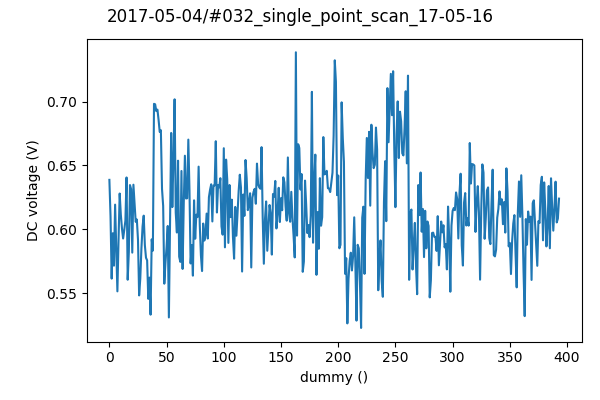

DataSet:
   data = load_data('2017-05-04/#032_single_point_scan_17-05-16')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | dummy_set  | dummy        | (5000,)
   Measured | DC_voltage | DC_voltage   | (5000,)
started at 2017-05-04 17:05:16


KeyboardInterrupt: 

In [16]:
DC_parameter.setup()
loop = Loop(dummy_parameter[0:5000:1], delay=0.2).each(DC_parameter)
data = loop.get_data_set(name='single_point_scan')
plot = loop.plot(data.DC_voltage)
loop.run()

# Testing

In [66]:
EPR_parameter = DCSweepParameter(sweep_name='TGAC')

In [67]:
EPR_parameter.sweep_voltages = [0,0.01,0.02]

In [68]:
EPR_parameter.setup()

KeyError: 'sweep_0'

In [65]:
from silq.parameters.acquisition_parameters import AcquisitionParameter
from silq.tools.general_tools import SettingsClass, clear_single_settings, \
    attribute_from_config
    
class DCSweepParameter(AcquisitionParameter):
    def __init__(self, sweep_name=None, **kwargs):
        super().__init__(name='DC_acquisition',
                         names=['DC_voltage'],
                         labels=['DC voltage'],
                         snapshot_value=False,
                         setpoint_names=((sweep_name,),),
                         setpoint_labels=((sweep_name,),),
                         shapes=((1,),),
                         **kwargs)

        self.pulse_settings = {'duration': 20}

        self.additional_pulses = []
        self._sweep_voltages = []
        self.sweep_pulse_names = []
        self.sweep_name = sweep_name
        self.samples = 1

    @property
    def sweep_voltages(self):
        return self._sweep_voltages

    @sweep_voltages.setter
    def sweep_voltages(self, sweep_voltages):
        self._sweep_voltages = sweep_voltages
        self.pulse_sequence.clear()

        self.pulse_sequence.add(*[
            DCPulse('sweep'.format(sweep_voltage),
                    acquire=True,
                    amplitude=sweep_voltage,
                    t_start=k*self.pulse_settings['duration'],
                    **self.pulse_settings)
            for k, sweep_voltage in enumerate(sweep_voltages)])
        self.sweep_pulse_names = ['sweep_{:.3f}'.format(sweep_voltage)
                                  for sweep_voltage in sweep_voltages]

        self.pulse_sequence.add(
            DCPulse(name='final',
                    connection_requirements=self.pulse_settings.get(
                        'connection_requirements', {})))

        self.pulse_sequence.add(*[pulse for pulse in self.additional_pulses])

        # Update metadata
        self.shapes = tuple((len(sweep_voltages),))
        self.setpoints = (tuple(sweep_voltages), )

    @clear_single_settings
    def get(self):
        self.setup()
        self.acquire(average_mode='point')
        self.results = [self.trace_segments['output'][pulse_name]
                        for pulse_name in self.sweep_pulse_names]
        return self.results



In [12]:
from qcodes.instrument.parameter import _is_nested_sequence_or_none
from qcodes.utils.helpers import is_sequence_of

In [34]:

for obji, shapei in zip(obj, shapes):
    if not is_sequence_of(obji, types, shape=(len(shapei),)):
        print((obji, types, (len(shapei),)))
        print(False)

at 2
(('asd',), (<class 'NoneType'>, <class 'str'>), (0,))
False


In [20]:
is_sequence_of(setpoint_names, tuple, shape=(len(shapes),))

True

In [33]:
import io
from collections import Iterator, Sequence, Mapping

def is_sequence(obj):
    """
    Test if an object is a sequence.

    We do not consider strings or unordered collections like sets to be
    sequences, but we do accept iterators (such as generators)
    """
    return (isinstance(obj, (Iterator, Sequence)) and
            not isinstance(obj, (str, bytes, io.IOBase)))


def is_sequence_of(obj, types=None, depth=None, shape=None):
    """
    Test if object is a sequence of entirely certain class(es).

    Args:
        obj (any): the object to test.

        types (Optional[Union[class, Tuple[class]]]): allowed type(s)
            if omitted, we just test the depth/shape

        depth (Optional[int]): level of nesting, ie if ``depth=2`` we expect
            a sequence of sequences. Default 1 unless ``shape`` is supplied.

        shape (Optional[Tuple[int]]): the shape of the sequence, ie its
            length in each dimension. If ``depth`` is omitted, but ``shape``
            included, we set ``depth = len(shape)``

    Returns:
        bool, True if every item in ``obj`` matches ``types``
    """
    if not is_sequence(obj):
        print('at 1')
        return False

    if shape in (None, ()):
        next_shape = None
        if depth is None:
            depth = 1
    else:
        if depth is None:
            depth = len(shape)
        elif depth != len(shape):
            raise ValueError('inconsistent depth and shape')

        if len(obj) != shape[0]:
            print('at 2')
            return False

        next_shape = shape[1:]

    for item in obj:
        if depth > 1:
            if not is_sequence_of(item, types, depth=depth - 1,
                                  shape=next_shape):
                print('at 3')
                return False
        elif types is not None and not isinstance(item, types):
            print('at 4')
            return False
    return True